# **Aprendizaje supervisado**
# SL13. Gradient boosting

## <font color='blue'>**Métodos Combinados de Aprendizaje (Emsemble)**</font>

Los métodos combinados (métodos de ensemble) utilizan múltiples algoritmos de aprendizaje para obtener un rendimiento predictivo que mejore el que podría obtenerse por medio de cualquiera de los algoritmos de aprendizaje individuales que lo constituyen.

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/Znw8dnsk/ensemble.png' border='0' alt='ensemble'/></a>

La idea de los métodos ensemble es considerar múltiples hipótesis simultáneamente para formar una hipótesis que, con suerte (y la ayuda de algunos teoremas esenciales), se comporte mejor. El término de métodos de ensemble se suele reservar para aquellas combinaciones que hacen uso de múltiples hipótesis pertenecientes a una misma familia, mientras que se usa el término más general de sistemas de aprendizaje múltiples cuando las hipótesis que se combinan provienen de diversas familias.

Evidentemente, debido a que los métodos combinados hacen uso de varias hipótesis simultáneas, se produce una elevación en los costos computacionales, por lo que suele ser habitual utilizar algoritmos rápidos como espacio de hipótesis base, como son los árboles de decisión.

Una combinación de algoritmos de aprendizaje supervisado es en si mismo un algoritmo de aprendizaje supervisado y puede ser entrenado y usado para hacer predicciones. Sin embargo, se debe tener en cuenta que una combinación de hipótesis (algoritmos) de una determinada familia no es necesariamente una hipótesis (algoritmo) de la misma familia, por lo que podríamos obtener mejores resultados que con los elementos individuales de la familia, aunque también podemos correr el riesgo de obtener un modelo sobreajustado si no se tienen algunas precauciones. En la práctica, la forma en que se seleccionan los modelos individuales que se combinan hacen uso de algunas técnicas que tienden a reducir los problemas relacionados con el exceso de ajuste de los datos de entrenamiento y mejoran la prediccióm conjunta.

**Empíricamente, se ha comprobado que cuando existe una diversidad significativa entre los modelos individuales, las combinaciones tienden a obtener mejores resultados**, por lo que muchos de los métodos existentes buscan promover la diversidad entre los modelos que se combinan, y ello provoca a veces que se usen como modelos aquellos que hacen un uso fuerte de la aleatoriedad, en vez de modelos más dirigidos y que funcionan mejor individualmente.

## <font color='blue'>**Agregación Bootstrap (Bagging)**</font>

La **agregación Bootstrap**, tambien conocida por **Bagging**, es realmente un meta-algoritmo diseñado para conseguir combinaciones de modelos a partir de una familia inicial, provocando una disminución de la varianza y evitando el sobreajuste. Aunque lo más común es aplicarlo con los métodos basados en árboles de decisión, se puede usar con cualquier familia.

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/7LrKDCpX/baggingcropped.png' border='0' alt='baggingcropped'/></a>

La técnica consiste en lo siguiente:

1. Dado un conjunto de entrenamiento, $D$, de tamaño $n$, el bagging genera $m$ nuevos conjuntos de entrenamiento, $D_{i}$, de tamaño $n'$, tomando al azar elementos de $D$ de manera uniforme y con reemplazo, por tanto, algunos elementos del conjunto original pueden aparecer repetidos en los nuevos conjuntos generados.
2. Si $n'=n$, entonces para valores de $n$ suficientemente grandes, se espera que cada $D_{i}$ tenga una fracción de $(1 - 1/e)$ elementos únicos de $D$, y el resto son duplicados.
3. A partir de estos $m$ nuevos conjuntos de entrenamiento se construyen $m$ nuevos modelos de aprendizaje, y la respuesta final de la combinación se consigue por medio de votación de las $m$ respuestas (en caso de buscar una clasificación) o por la media de ellas (en caso de buscar una regresión).

Se ha probado que el bagging tiende a producir mejoras en los casos de modelos individuales inestables (como es el caso de las redes neuronales o los árboles de decisión), pero puede producir resultados mediocres o incluso empeorar los resultados con otros métodos, como el de los KNN.

## <font color='blue'>**Boosting**</font>

A diferencia del bagging, en el **boosting** no se crean versiones del conjunto de entrenamiento, sino que se trabaja siempre con el conjunto completo de entrada, y se manipulan los pesos de los datos para generar modelos distintos.

La idea es que en cada iteración se incremente el peso de los objetos mal clasificados por el predictor en esa iteración, por lo que en la construcción del próximo predictor estos objetos serán más importantes y será más probable clasificarlos bien.

El método de boosting más famoso es el que se conoce como AdaBoost que consta de los siguientes pasos:

1. Inicialmente, a todos los datos del conjunto de entrenamiento se les asigna un peso idéntico, $w_{i}=1/n$, donde $n$ es el tamaño del conjunto de datos.
2. Se entrena el modelo usando el conjunto de entrenamiento.
3. Se calcula el error del modelo en el conjunto de entrenamiento, se cuentan cuántos objetos han sido mal clasificados y se identifican cuáles son.
4. Se incrementan los pesos en aquellos casos de entrenamiento en los que el modelo anterior ha dado resultados erróneos.
5. Se entrena un nuevo modelo usando el conjunto de pesos modificados.
6. Volver al punto 3 (y se repite el proceso hasta el número de iteraciones fijadas inicialmente).
7. El modelo final se consigue por votación ponderada usando los pesos de todos los modelos.

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/cC3cV0XP/boosting.png' border='0' alt='boosting'/></a>

Concretamente, para modificar los pesos tras el cálculo del predictor Mt con los pesos en el tiempo t, wi,t se utilizan las siguientes ecuaciones:

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/FHyBYgbw/ec1.png' border='0' alt='ec1'/></a><br />

donde $x_{i}$ es el vector de entrada del objeto, $y_{i}$ es la clase del objeto i-ésimo, y $M_{t}(x_{i})$ es la predicción del modelo para la entrada $x_{i}$.

Tras esto, los pesos son actualizados de la siguiente forma:

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/6pJP61Zd/ec2.png' border='0' alt='ec2'/></a>

donde $c$ es una constante de normalización elegida de forma que

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/vmGSfg3T/ec3.png' border='0' alt='ec3'/></a>

La combinación construida clasifica por medio del voto de la mayoría, ponderando cada modelo $M_{t}$ por medio de $α_{t}$. Es decir:

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/0NZXfkBf/ec4.png' border='0' alt='ec4'/></a>

Normalmente, se espera una mejora significativa sobre la clasificación producida por cada uno de los modelos individuales, pero la convergencia no está garantizada y el rendimiendo podría degradarse tras un cierto número de pasos.

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/WbJKvPdN/boost2.jpg' border='0' alt='boost2'/></a>

## ¿Cuál es mejor, Bagging o Boosting?

No hay un ganador absoluto, depende de los datos, la simulación y las circunstancias. Ambos disminuyen la varianza de su estimación única, ya que combinan varias estimaciones de diferentes modelos, así que el resultado puede ser un modelo con mayor estabilidad.

Si el problema es que el modelo único obtiene un rendimiento muy bajo, Bagging rara vez obtendrá un mejor sesgo. Sin embargo, Boosting podría generar un modelo combinado con errores más bajos, ya que optimiza las ventajas y reduce las dificultades del modelo único.

Por el contrario, si la dificultad del modelo único se adapta en exceso, entonces la mejor opción es Bagging. Boosting por su parte no ayuda a evitar el sobreajuste, de hecho, esta técnica se enfrenta a este problema en sí, por esta razón, Bagging es efectivo más a menudo que Boosting.

## Ventajas

  * Son capaces de seleccionar predictores de forma automática.
  * Pueden aplicarse a problemas de regresión y clasificación.
  * Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.
  * Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.
  * Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización).
  * No se ven muy influenciados por *outliers*.
  * Si para alguna observación, el valor de un predictor no está disponible, a pesar de no poder llegar a ningún nodo terminal, se puede conseguir una predicción empleando todas las observaciones que pertenecen al último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.
  * Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.
  * Tienen buena escalabilidad, pueden aplicarse a conjuntos de datos con un elevado número de observaciones.

## Desventajas

  * Al combinar múltiples árboles, se pierde la interpretabilidad que tienen los modelos basados en un único árbol.
  * Cuando tratan con predictores continuos, pierden parte de su información al categorizarlas en el momento de la división de los nodos.
  * La creación de las ramificaciones de los árboles se consigue mediante el algoritmo de recursive binary splitting. Este algoritmo identifica y evalúa las posibles divisiones de cada predictor acorde a una determinada medida (RSS, Gini, entropía, entre otros). Los predictores continuos o predictores cualitativos con muchos niveles tienen mayor probabilidad de contener, solo por azar, algún punto de corte óptimo, por lo que suelen verse favorecidos en la creación de los árboles.
  * No son capaces de extrapolar fuera del rango de los predictores observado en los datos de entrenamiento.


## Gradient Boosting en Python

Debido a sus buenos resultados, **Gradient Boosting** se ha convertido en el algoritmo de referencia cuando se trata con datos tabulares, de ahí que se hayan desarrollado múltiples implementaciones. Cada una tiene unas características que las hacen más adecuadas dependiendo del caso de uso. [Scikit-learn](https://scikit-learn.org/stable/index.html), tiene dos implementaciones nativas:

```GradientBoostingClassifier``` y ```GradientBoostingRegressor```: son las primeras implementaciones que se hicieron de Gradient Boosting en scikit-learn.

* No realiza binning
* Utiliza un único core (no paraleliza ninguna de las partes del algoritmo)
* Permite trabajar sobre matrices sparse
* Necesario hacer one-hot-encoding de variables categóricas

```HistGradientBoostingClassifier``` y ```HistGradientBoostingRegressor```: nueva implementación inspirada en LightGBM. Esta segunda implementación tiene muchas más ventajas que la original, principalmente, su rapidez.

* Sí realiza binning
* Multicore (paraleliza algunas partes del algoritmo)
* No permite trabajar sobre matrices sparse
* Permite que las observaciones incluyan valores missing
* Permite restricciones monotónicas
* No es necesario one-hot-encoding de variables categóricas (en construcción).

Además de las opciones nativas, scikit-learn permite acceder a otras de las principales implementaciones de Gradient Boosting disponibles en Python:

```LightGBM```:

* Permite que las observaciones incluyan valores missing
* Permite el uso de GPUs 
* Entrenamiento paralelizado (paraleliza algunas partes del algoritmo)
* Permite restricciones monotónicas
* Permite trabajar sobre matrices sparse
* No es necesario one-hot-encoding de variables categóricas

```XGBoost```:

* Permite que las observaciones incluyan valores missing
* Permite el uso de GPUs
* Entrenamiento paralelizado (paraleliza algunas partes del algoritmo)
* Permite restricciones monotónicas
* Permite trabajar sobre matrices sparse
* Necesario one-hot-encoding de variables categóricas

```CatBoost```:

* Optimizado principalmente para variables categóricas
* Utiliza árboles simétricos
* Permite que las observaciones incluyan valores missing
* Permite el uso de GPUs
* Entrenamiento paralelizado (paraleliza algunas partes del algoritmo)
* Permite restricciones monotónicas

```H2O```:

* Sí realiza binning
* Multicore (paraleliza algunas partes del algoritmo)
* Permite que las observaciones incluyan valores missing
* Permite restricciones monotónicas
* No es necesario one-hot-encoding de variables categóricas

Si bien todas estas librerías disponen de un API para utilizarlas a través de scikit-learn, algunas de sus funcionalidades son accesibles de esta forma, por lo que, para un uso más preciso, es recomendable utilizar su API nativa.

Otro aspecto a tener en cuenta es el modo en que tratan las variables categóricas (con o sin one-hot-encoding). Esto tiene impacto directo en la estructura de los árboles generados y, en consecuencia, en los resultados predictivos del modelo y en la importancia calculada para los predictores.

## <font color='blue'>**Gradient Boosted Regression Trees**</font>





In [ ]:
class Estimator(object):
  
    def fit(self, X, y=None):
        """Fits estimator to data. """
        # set state of ``self``
        return self
            
    def predict(self, X):
        """Predict response of ``X``. """
        # compute predictions ``pred``
        return pred

Scikit-learn proporciona dos estimadores para Gradient Boosting: `` GradientBoostingClassifier`` y `` GradientBoostingRegressor``, ambos se encuentran en el paquete `` sklearn.ensemble``:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

Los estimadores tienen argumentos para controlar el comportamiento de ajuste; estos argumentos a menudo se denominan _hiperparámetros_. Entre los más importantes para GBRT se encuentran:

  * número de árboles de regresión (o clasificación) (`` n_estimators`` )
  * profundidad de cada árbol individual (`` max_depth`` )
  * función de pérdida (``loss`` )

Por ejemplo, si desea ajustar un modelo de regresión con 100 árboles de profundidad 3 utilizando mínimos cuadrados:

In [ ]:
est = GradientBoostingRegressor(n_estimators=100, max_depth=3, loss='ls')

In [ ]:
est?

Aquí hay un ejemplo independiente que muestra cómo ajustar un `` GradientBoostingClassifier``  a un conjunto de datos sintéticos:

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split

# generate synthetic data from ESLII - Example 10.2
X, y = make_hastie_10_2(n_samples=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# fit estimator
est2 = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est2.fit(X_train, y_train)

# predict class labels
pred = est2.predict(X_test)

# score on test data (accuracy)
acc = est2.score(X_test, y_test)
print('ACC: %.4f' % acc)

# predict class probabilities
est2.predict_proba(X_test)[0]

ACC: 0.9240


array([0.87287772, 0.12712228])

El estado del estimador se almacena en atributos de instancia que tienen un guión bajo al final ('\ _'). Por ejemplo, la secuencia de árboles de regresión (objetos `` DecisionTreeRegressor `` ) se almacena en `` est.estimators_``:

In [ ]:
est2.estimators_[0, 0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x7F5C4E1AA490)

## <font color='green'>**Actividad 1**</font>

Entrene un Gradient Boosting Classifier para los siguientes datos:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data
y=digits.target

Haga una separacion train test de 70-30 y entrene un modelo con 200 estimadores.

In [ ]:
#Solución

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Aplicando Gradient Boosted Regression Trees**</font>

Aproximación de una función

  * Función sinusoidal + ruido gaussiano 
  * Entrenamiento: puntos azules
  * Test: puntos rojos

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


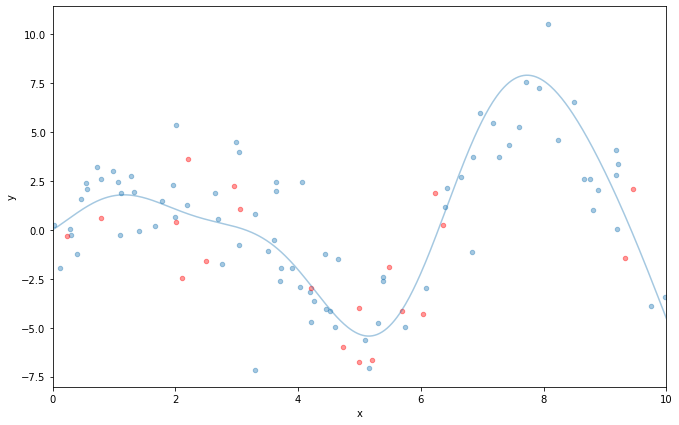

In [ ]:
%pylab inline
import numpy as np
from sklearn.model_selection import train_test_split

FIGSIZE = (11, 7)

def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x * np.sin(x) + np.sin(2 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(15)
    X = np.random.uniform(0, 10, size=n_samples)[:, np.newaxis]
    y = ground_truth(X.ravel()) + np.random.normal(scale=2, size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(100)

# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(alpha=0.4, s=20):
    fig = plt.figure(figsize=FIGSIZE)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=alpha, label='ground truth')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=s, alpha=alpha)
    plt.scatter(X_test, y_test, s=s, alpha=alpha, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
    
annotation_kw = {'xycoords': 'data', 'textcoords': 'data',
                 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}
    
plot_data()

## Regression Trees

  * El argumento `` max_depth `` controla la profundidad del árbol
  * Cuanto más profundo es el árbol, más varianza se puede explicar

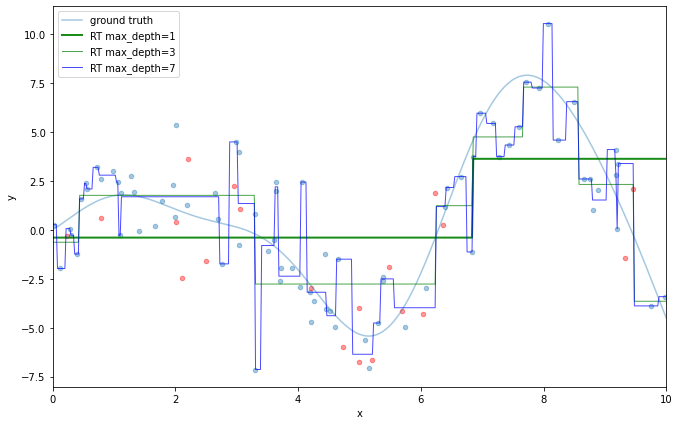

In [ ]:
from sklearn.tree import DecisionTreeRegressor
plot_data()
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)

est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=3', color='g', alpha=0.7, linewidth=1)

est = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=7', color='b', alpha=0.7, linewidth=1)

plt.legend(loc='upper left')

## Aproximación de la función con Gradient Boosting

  * El argumento `` n_estimators`` controla el número de árboles
  * El método `` staged_predict`` nos permite recorrer las predicciones a medida que agregamos más árboles

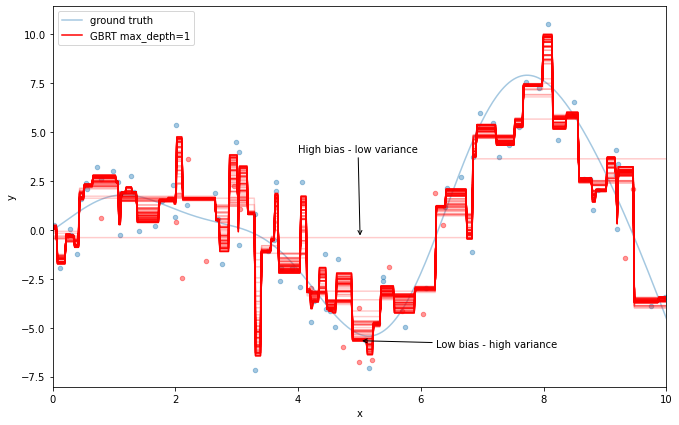

In [ ]:
from itertools import islice

plot_data()
est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0)
est.fit(X_train, y_train)

ax = plt.gca()
first = True

# step through prediction as we add 10 more trees.
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, est.n_estimators, 10):
    plt.plot(x_plot, pred, color='r', alpha=0.2)
    if first:
        ax.annotate('High bias - low variance', xy=(x_plot[x_plot.shape[0] // 2],
                                                    pred[x_plot.shape[0] // 2]),
                                                    xytext=(4, 4), **annotation_kw)
        first = False

pred = est.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, pred, color='r', label='GBRT max_depth=1')
ax.annotate('Low bias - high variance', xy=(x_plot[x_plot.shape[0] // 2],
                                            pred[x_plot.shape[0] // 2]),
                                            xytext=(6.25, -6), **annotation_kw)
plt.legend(loc='upper left')

## Complejidad del modelo

  * El número de árboles y la profundidad de los árboles individuales controlan la complejidad del modelo
  * La complejidad del modelo tiene un precio: **sobreajuste**
  
  
## Gráfico de desviación

  * Diagnóstico para determinar si el modelo está sobreajustado
  * Traza el error de entrenamiento / prueba (desviación) en función del número de árboles (= complejidad del modelo)
  * El error de entrenamiento (desviación) se almacena en `` est.train_score_``
  * El error de prueba se calcula usando ``est.staged_predict ``

Text(810, 3.5, 'train-test gap')

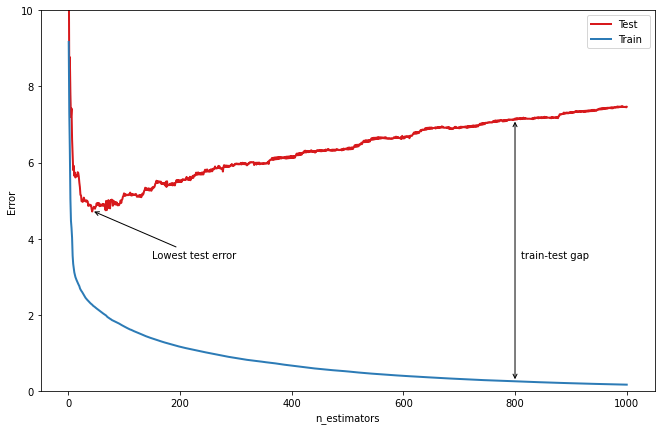

In [ ]:
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', 
                  test_color='#d7191c', alpha=1.0, ylim=(0, 10)):
    """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize=FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
             linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
             label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(ylim)
    return test_dev, ax

test_dev, ax = deviance_plot(est, X_test, y_test)
ax.legend(loc='upper right')

# add some annotations
ax.annotate('Lowest test error', xy=(test_dev.argmin() + 1, test_dev.min() + 0.02),
            xytext=(150, 3.5), **annotation_kw)

ann = ax.annotate('', xy=(800, test_dev[799]),  xycoords='data',
                  xytext=(800, est.train_score_[799]), textcoords='data',
                  arrowprops={'arrowstyle': '<->'})
ax.text(810, 3.5, 'train-test gap')

## Sobreajuste (Overfitting)

  * El modelo tiene demasiada capacidad y comienza a ajustarse a los datos de entrenamiento
  * Indicado por una gran brecha entre el error de entrenamiento y el error de prueba
  * GBRT proporciona una serie de parametros para controlar el sobreajuste

## Regularización

  * Estructura de árbol
  * Contracción
  * Impulso de gradiente estocástico

## Estructura de árbol

  * El `` max_depth``  de los árboles controla el grado de interacciones de características (varianza ++)
  * Utilice `` min_samples_leaf``  para tener una cantidad suficiente de muestras por hoja (sesgo ++)

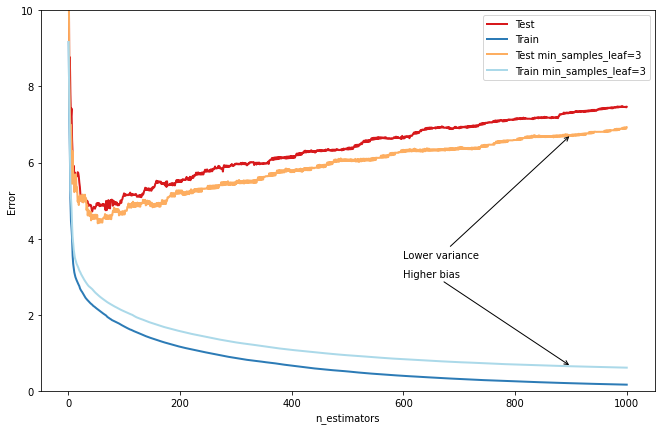

In [ ]:
def fmt_params(params):
    return ", ".join("{0}={1}".format(key, val) for key, val in params.items())

fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')),
                                          ({'min_samples_leaf': 3}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, 
                                    learning_rate=1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
                                 train_color=train_color, test_color=test_color)
    
ax.annotate('Higher bias', xy=(900, est.train_score_[899]), xytext=(600, 3), **annotation_kw)
ax.annotate('Lower variance', xy=(900, test_dev[899]), xytext=(600, 3.5), **annotation_kw)
plt.legend(loc='upper right')

## Contracción

 * Aprendizaje lento al reducir las predicciones de cada árbol en un pequeño escalar (`` learning_rate`` )
 * Una ``learning_rate``  más baja requiere una mayor cantidad de ``n_estimadores`` 
 * Es una compensación entre tiempo de ejecución y precisión.

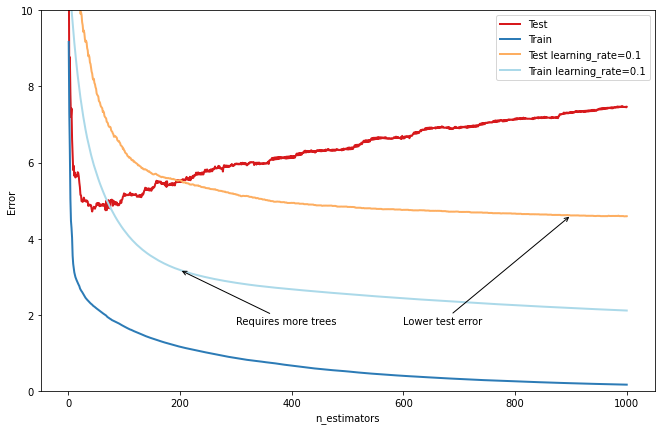

In [ ]:
fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')),
                                          ({'learning_rate': 0.1},
                                           ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    
    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
                                 train_color=train_color, test_color=test_color)
    
ax.annotate('Requires more trees', xy=(200, est.train_score_[199]), 
            xytext=(300, 1.75), **annotation_kw)
ax.annotate('Lower test error', xy=(900, test_dev[899]),
            xytext=(600, 1.75), **annotation_kw)
plt.legend(loc='upper right')

## Stochastic Gradient Boosting

 * Submuestreo del conjunto de entrenamiento antes de hacer crecer cada árbol (`` subsample ``)
 * Submuestreo de las características antes de encontrar el mejor nodo dividido (`` max_features ``)
 * La última suele funcionar mejor si hay una cantidad suficiente de funciones

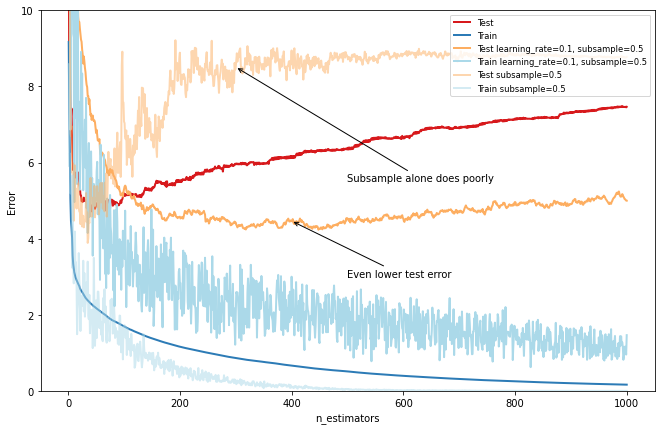

In [ ]:
fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')),
                                          ({'learning_rate': 0.1, 'subsample': 0.5},
                                           ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0,
                                    random_state=1)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
                                 train_color=train_color, test_color=test_color)
    
ax.annotate('Even lower test error', xy=(400, test_dev[399]),
            xytext=(500, 3.0), **annotation_kw)

est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0,
                                subsample=0.5)
est.fit(X_train, y_train)
test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params({'subsample': 0.5}),
                             train_color='#abd9e9', test_color='#fdae61', alpha=0.5)
ax.annotate('Subsample alone does poorly', xy=(300, test_dev[299]), 
            xytext=(500, 5.5), **annotation_kw)
plt.legend(loc='upper right', fontsize='small')

## <font color='blue'>**Ajuste de Hiperparámetros**</font>

Para ajustar los hiperparámetros se puede realizar el siguiente proceso:

  1. Elija `` n_estimators``  tan grande como sea posible (computacionalmente) (por ejemplo, 3000)
  2. Sintonice `` max_depth``, `` learning_rate``, `` min_samples_leaf`` y `` max_features`` mediante GridSearch
  3. Aumente `` n_estimators`` aún más y ajuste ``learning_rate`` nuevamente manteniendo los otros parámetros fijos

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5],  ## depends on the nr of training examples
               'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }

est = GradientBoostingRegressor(n_estimators=3000)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, scoring='neg_mean_squared_error', n_jobs=4).fit(X_train, y_train)

# best hyperparameter setting
print('Best hyperparameters: %r' % gs_cv.best_params_)

Best hyperparameters: {'learning_rate': 0.001, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 5}


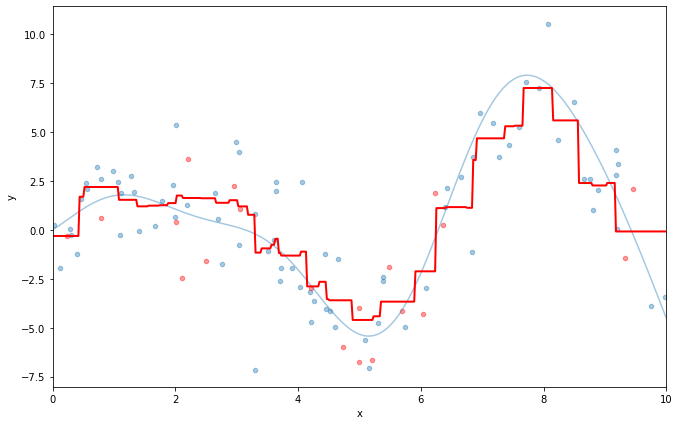

In [ ]:
# refit model on best parameters
est.set_params(**gs_cv.best_params_)
est.fit(X_train, y_train)

# plot the approximation
plot_data()
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='r', linewidth=2)

## <font color='blue'>**Ejemplo: California Housing**</font>

* Predecir el valor medio de la vivienda para los grupos de bloques del censo en California
 * Base de datos: 20.000 grupos, 8 características: *ingreso medio*, *edad promedio de la vivienda*, *latitud*, *longitud*, ...
 * Métrica:Error absoluto medio en el conjunto de prueba (20% de la BD)

In [ ]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

In [ ]:
names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Desafíos:

  * características heterogéneas (diferentes escalas y distribuciones, ver gráfico a continuación)
  * interacciones de características no lineales (interacción: latitud y longitud)
  * respuestas extremas (técnicas de regresión robustas)


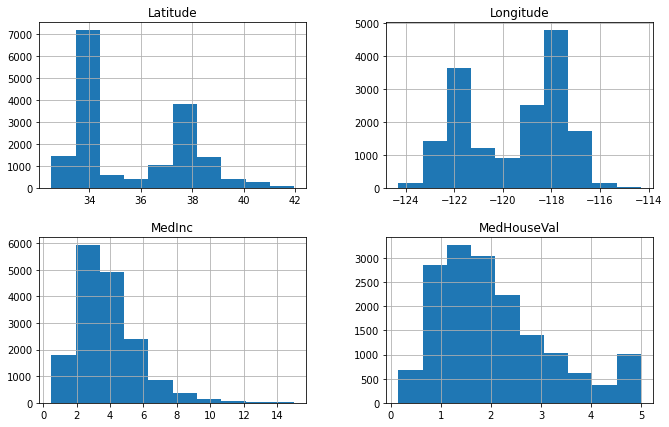

In [ ]:
import pandas as pd
X_df = pd.DataFrame(data=X_train, columns=names)
X_df['MedHouseVal'] = y_train
_ = X_df.hist(column=['Latitude', 'Longitude', 'MedInc', 'MedHouseVal'], figsize=FIGSIZE)

## Evaluación

  * GBRT vs RandomForest vs SVM vs Ridge Regression

In [ ]:
import time
from collections import defaultdict
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

res = defaultdict(dict)

def benchmark(est, name=None):
    if not name:
        name = est.__class__.__name__
    t0 = time.clock()
    est.fit(X_train, y_train)
    res[name]['train_time'] = time.clock() - t0
    t0 = time.clock()
    pred = est.predict(X_test)
    res[name]['test_time'] = time.clock() - t0
    res[name]['MAE'] = mean_absolute_error(y_test, pred)
    return est
    
benchmark(DummyRegressor())
benchmark(Ridge(alpha=0.0001, normalize=True))
benchmark(Pipeline([('std', StandardScaler()), 
                    ('svr', SVR(kernel='rbf', C=10.0, gamma=0.1, tol=0.001))]), name='SVR')
benchmark(RandomForestRegressor(n_estimators=100, max_features=5, random_state=0, 
                                bootstrap=False, n_jobs=4))
est = benchmark(GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.1,
                                          loss='huber', min_samples_leaf=3, 
                                          random_state=0))

res_df = pd.DataFrame(data=res).T
res_df[['train_time', 'test_time', 'MAE']].sort_values('MAE', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has 

,train_time,test_time,MAE
DummyRegressor,0.000630,0.000474,0.909090
Ridge,0.020672,0.001696,0.532860
SVR,21.376508,3.186644,0.379575
RandomForestRegressor,18.215192,0.244048,0.319039
GradientBoostingRegressor,31.908172,0.039973,0.300736


## <font color='green'>Actividad 2</font>

El `` GradientBoostingRegressor``  anterior no está ajustado correctamente para este conjunto de datos. Diagnostique el modelo actual y encuentre configuraciones de hiperparámetros más apropiadas.

In [ ]:
# Solución

<font color='green'>Fin Actividad 2</font>

## Importancia de las características

  * ¿Cuáles son las características importantes y cómo contribuyen a predecir la respuesta objetivo?
  * Derivado de los árboles de regresión
  * Se puede acceder a través del atributo `` est.feature_importances_``

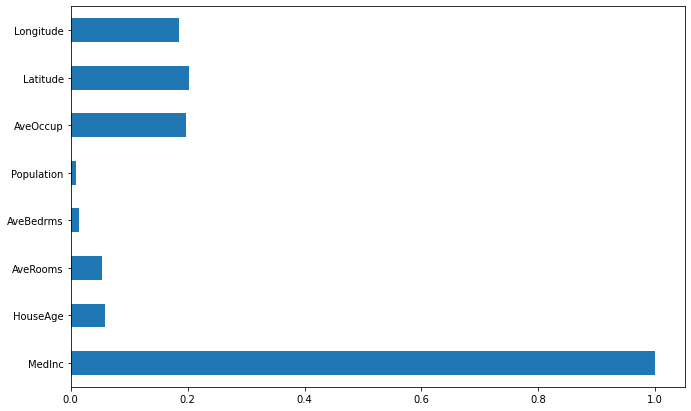

In [ ]:
fx_imp = pd.Series(est.feature_importances_, index=names)
fx_imp /= fx_imp.max()  # normalize
fx_imp.sort_values()
fx_imp.plot(kind='barh', figsize=FIGSIZE)

## Dependencia parcial

  * Relación entre la respuesta y un conjunto de características, marginando todas las demás características
  * Intuitivamente: respuesta esperada en función de las características a las que condicionamos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


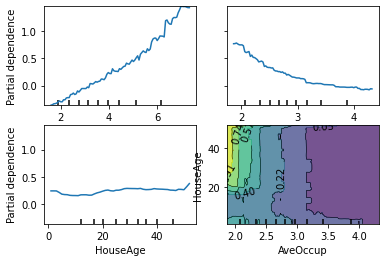

In [ ]:
from sklearn.inspection import plot_partial_dependence

features = ['MedInc', 'AveOccup', 'HouseAge',
            ('AveOccup', 'HouseAge')]
plot_partial_dependence(est, X_train, features, feature_names=names, 
                                   n_cols=2)

## Resumen

 - Técnica flexible de clasificación y regresión no paramétrica
 - Aplicable a una variedad de problemas
 - Implementación sólida en scikit-learn
 

## <font color='green'>Actividad 3</font>

Para el siguiente dataset encuentre los mejores parametros con GridSearchCV e implemente la experimentacion con 5-fold cross-validation. Reporte el F1, precision y recall.

In [ ]:
from sklearn.datasets import fetch_covtype
X, y = fetch_covtype(return_X_y=True)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

<font color='green'>Fin Actividad 3</font>